<a href="https://colab.research.google.com/github/ayan3b/DATASET/blob/main/Adult_xgboost_target_encoding_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing the basic library for EDA

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

In [2]:
#Reading the processed Adult data file where only ategorical variable not encoded

df = pd.read_csv('https://raw.githubusercontent.com/ayan3b/DATASET/main/ADULT/Adult_without_encoder_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32537 entries, 0 to 32536
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        32537 non-null  int64  
 1   age               32537 non-null  int64  
 2   workclass         32537 non-null  object 
 3   fnlwgt            32537 non-null  int64  
 4   education         32537 non-null  object 
 5   education-num     32537 non-null  int64  
 6   marital-status    32537 non-null  object 
 7   occupation        32537 non-null  object 
 8   relationship      32537 non-null  object 
 9   race              32537 non-null  object 
 10  sex               32537 non-null  object 
 11  capital-gain      32537 non-null  int64  
 12  capital-loss      32537 non-null  int64  
 13  hours-per-week    32537 non-null  int64  
 14  native-country    32537 non-null  object 
 15  income            32537 non-null  object 
 16  income_binary     32537 non-null  int64 

In [4]:
df.head()


,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,hours-per-week,native-country,income,income_binary,age_s,fnlwgt_s,education_num_s,capital_gain_s,capital_loss_s,hours_per_week_s
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,40,United-States,<=50K,0,0.030390,-1.063569,1.134777,0.148292,-0.216743,-0.035664
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,13,United-States,<=50K,0,0.836973,-1.008668,1.134777,-0.145975,-0.216743,-2.222483
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,40,United-States,<=50K,0,-0.042936,0.245040,-0.420679,-0.145975,-0.216743,-0.035664
3,3,53,Private,234721,HS-grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,40,United-States,<=50K,0,1.056950,0.425752,-1.198407,-0.145975,-0.216743,-0.035664
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,40,Cuba,<=50K,0,-0.776193,1.408066,1.134777,-0.145975,-0.216743,-0.035664


In [5]:
# Checking the null value presence
df.isnull().sum()

Unnamed: 0          0
age                 0
workclass           0
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country      0
income              0
income_binary       0
age_s               0
fnlwgt_s            0
education_num_s     0
capital_gain_s      0
capital_loss_s      0
hours_per_week_s    0
dtype: int64

## Education

In [6]:
# Ordinal encoding o education object
def education_ordinal_encoding(val):
  if val == 'Preschool':
    return 1
  elif val == 'School':
    return 2
  elif val == 'HS-grad':
    return 3
  elif val == 'AssociateLevel':
    return 4
  elif val == 'Bachelors':
    return 5
  elif val == 'Masters':
    return 6
  elif val == 'Prof-school':
    return 7
  elif val == 'Doctorate':
    return 8
  else :
    return 0

In [7]:
df['education_e'] = df.education.apply(lambda x : education_ordinal_encoding(x))

df[['education','education_e']].head()

,education,education_e
0,Bachelors,5
1,Bachelors,5
2,HS-grad,3
3,HS-grad,3
4,Bachelors,5


## AGE

Age is a continuous numeric feature and want to see the distribution

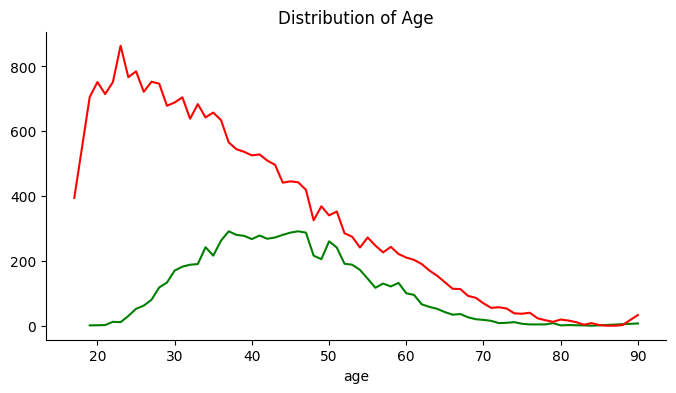

In [24]:
# The age distribution where income <= 50K

from matplotlib import pyplot as plt
df_temp = df[df.income_binary == 1].groupby(['age']).agg({'income_binary' : 'count'})
df_temp['income_binary'].plot(kind='line', c='green', figsize=(8, 4), title='Distribution of Age')
df_temp1 = df[df.income_binary == 0].groupby(['age']).agg({'income_binary' : 'count'})
df_temp1['income_binary'].plot(kind='line', c='red', figsize=(8, 4), title='Distribution of Age')
plt.gca().spines[['top', 'right']].set_visible(False)

As the distribution shows age between 30 - 55 people have greater chance of earning more than 50K.

We can create bin of age

less than 25 age - student

25 to less than 35 age - junior

35 to less 55 age - mid senior level

greater than 55 age - senior level



<Axes: >

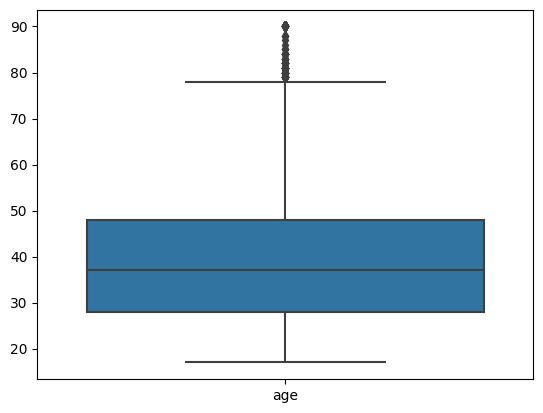

In [20]:
import seaborn as sns
sns.boxplot( data = df[['age']], orient="v")

In [27]:
# Ordinal encoding o education object
def age_categorical(val):
  if val < 25:
    return 'STUDENT'
  elif val >= 25 and val < 35:
    return 'JUNIOR'
  elif val >= 35 and val < 55:
    return 'MIDSENIOR'
  elif val >= 55:
    return 'SENIOR'
  else :
    return 'Undefined'

In [44]:
df['age_cat'] = df.age.apply(lambda x : age_categorical(x))

df[['age_cat']].value_counts()

age_cat  
MIDSENIOR    13995
JUNIOR        8473
STUDENT       5562
SENIOR        4507
dtype: int64

## SEX

In [37]:
# making SEX attribute as a binary
df.sex.value_counts()

Male      21775
Female    10762
Name: sex, dtype: int64

In [38]:
df['sex_bin'] = df.sex.apply(lambda x : 1 if x == 'Female' else 0)

df[['sex','sex_bin']].value_counts()

sex     sex_bin
Male    0          21775
Female  1          10762
dtype: int64

## Marital Status

In [43]:
df[['marital-status','income_binary']].value_counts().sort_index()

marital-status         income_binary
Divorced               0                 3978
                       1                  463
Married-AF-spouse      0                   13
                       1                   10
Married-civ-spouse     0                 8280
                       1                 6690
Married-spouse-absent  0                  384
                       1                   34
Never-married          0                10176
                       1                  491
Separated              0                  959
                       1                   66
Widowed                0                  908
                       1                   85
dtype: int64

Married-AF-spouse -  Spouse in Armed force

Married-civ-spouse - Civilian spouse

The above 2 category can be marked as Married

Never-Married another group

Married-spouse-absent  - married people living apart
Separated
Divorced
Widowed

The above 4 category can be marked as Spouse Absent

So the three group can be created for marital-status attribute

In [45]:
# Marital status has been grouped into 4 category

def marital_status_group(val):
  if val == 'Married-AF-spouse' or val == 'Married-civ-spouse':
    return 'Married'
  elif val == 'Never-married':
    return 'Never-married'
  elif val == 'Married-spouse-absent' or val == 'Separated' or val == 'Divorced' or val == 'Widowed':
    return 'Spouse-Absent'
  else :
    return 'Undefined'

In [47]:
df['marital_status_cat'] = df['marital-status'].apply(lambda x : marital_status_group(x))

df[['marital_status_cat','marital-status']].value_counts().sort_index()

marital_status_cat  marital-status       
Married             Married-AF-spouse           23
                    Married-civ-spouse       14970
Never-married       Never-married            10667
Spouse-Absent       Divorced                  4441
                    Married-spouse-absent      418
                    Separated                 1025
                    Widowed                    993
dtype: int64

<Axes: >

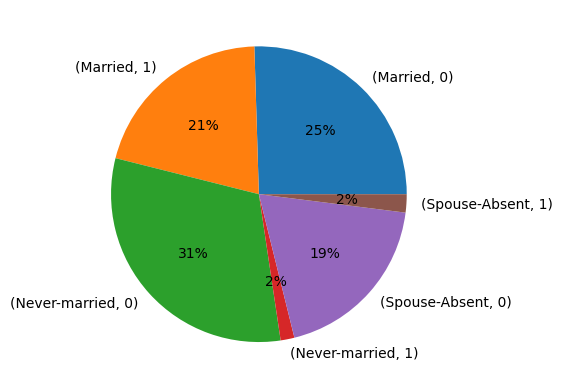

In [53]:
df[['marital_status_cat','income_binary']].value_counts(normalize=True).sort_index().plot(kind='pie', autopct='%1.0f%%')

Those are married people having income distributed evenly but for other two group having only 2% where income > 50K

## RACE

In [54]:
df.race.value_counts()

White    27795
Black     3122
Other     1620
Name: race, dtype: int64

<Axes: >

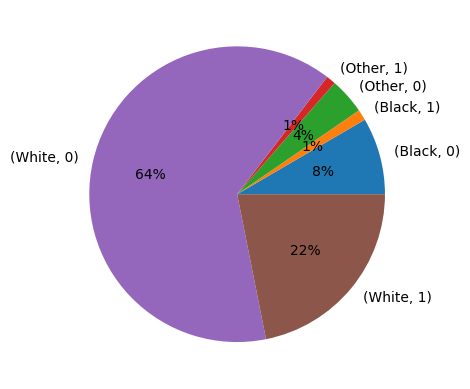

In [55]:
df[['race','income_binary']].value_counts(normalize=True).sort_index().plot(kind='pie', autopct='%1.0f%%')

White people are dominating to have income more than 50K

the black and Other type of people only 1% of the data having more than 50K income

## Relationship

In [58]:
df.relationship.value_counts()

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

<Axes: xlabel='relationship,income_binary'>

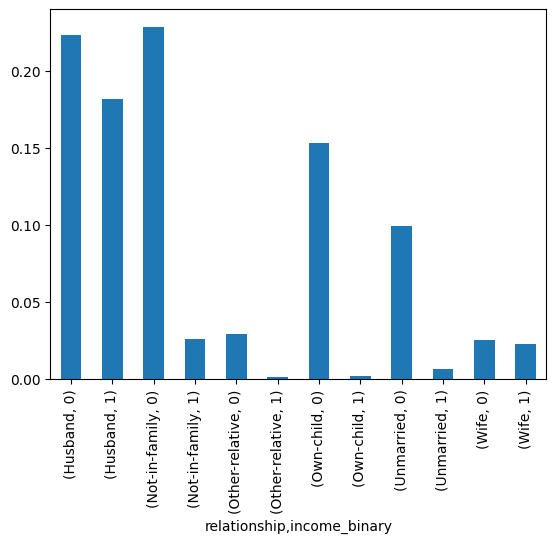

In [61]:
df[['relationship','income_binary']].value_counts(normalize=True).sort_index().plot(kind='bar')

Husband and Wife relationship having balanced poportion between income

rest of the relationship type can be grouped under Other category

rest 3 category would be family

In [64]:
# relationship has been grouped into 3 category

def relationship_group(val):
  if val == 'Not-in-family' or val == 'Unmarried' or val == 'Other-relative':
    return 'Other'
  elif val == 'Husband' or val == 'Wife' or val == 'Own-child':
    return 'Family'
  else :
    return 'Undefined'

In [65]:
df['relationship_cat'] = df['relationship'].apply(lambda x : relationship_group(x))

df[['relationship_cat','relationship']].value_counts().sort_index()

relationship_cat  relationship  
Family            Husband           13187
                  Own-child          5064
                  Wife               1568
Other             Not-in-family      8292
                  Other-relative      981
                  Unmarried          3445
dtype: int64

<Axes: >

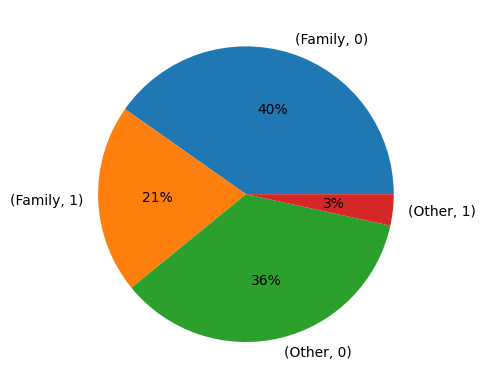

In [66]:
df[['relationship_cat','income_binary']].value_counts(normalize=True).sort_index().plot(kind='pie', autopct='%1.0f%%')

## Occupation

In [67]:
df.occupation.value_counts()

Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
undefined            1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64

<Axes: ylabel='occupation,income_binary'>

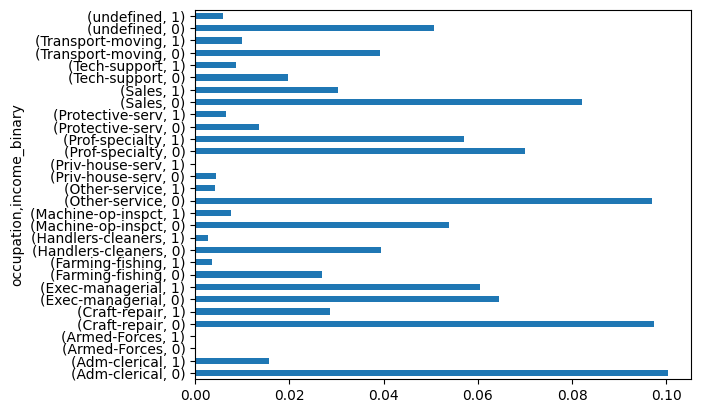

In [72]:
df[['occupation','income_binary']].value_counts(normalize=True).sort_index().plot(kind='barh')

There are below occupation where we can see proper distribution of income

Exec-managerial, Prof-speciality, Tech-Support, Sales, Protective-Serv

In [80]:
df[df.occupation == 'Priv-house-serv'].groupby(['occupation','income_binary']).agg({'income_binary' : 'count'})

income_binary
occupation      income_binary               
Priv-house-serv 0                        146
                1                          1

In [71]:
#df_derived_category = df.copy()
#df_derived_category.to_csv('/content/sample_data/Adult_derived_category_for_encoding.csv')

## encoding on the categorical attributes One Hot encoding

In [30]:
pip install -U scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 23.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [31]:
from sklearn.preprocessing import TargetEncoder

In [81]:
# Selecting the columns to be target encoded
columns_to_encode = ['age_cat', 'workclass', 'occupation','relationship_cat','marital_status_cat','race']

# Creating an instance of OneHotEncoder
encoder = TargetEncoder()

# Fit and transform the selected categorical columns
encoded_columns = encoder.fit_transform(df[columns_to_encode], df['income_binary'])

# Creating a DataFrame from the encoded columns
df_encoded = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(columns_to_encode))

#renaming of the column names of encoded dataframe
df_encoded.rename(
    columns={'age_cat': 'age_cat_e', 'workclass': 'workclass_e', 'occupation': 'occupation_e', 'relationship_cat': 'relationship_cat_e', 'marital_status_cat': 'marital_status_cat_e', 'race': 'race_e' },
    inplace=True,
)

# Concatenating the encoded DataFrame with the original DataFrame, dropping the original categorical columns
#df = pd.concat([df, df_encoded], axis=1).drop(columns=columns_to_encode)

df_encoded_for_xgboost = pd.concat([df, df_encoded], axis=1)

# Display the updated DataFrame
df_encoded_for_xgboost.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,age_cat,sex_bin,marital_status_cat,relationship_cat,age_cat_e,workclass_e,occupation_e,relationship_cat_e,marital_status_cat_e,race_e
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,MIDSENIOR,0,Never-married,Other,0.359519,0.259660,0.131672,0.087151,0.046219,0.256240
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,MIDSENIOR,0,Married,Family,0.361303,0.286311,0.477095,0.338059,0.444726,0.255898
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,MIDSENIOR,0,Spouse-Absent,Other,0.359519,0.219838,0.059476,0.087151,0.093348,0.256240
3,3,53,Private,234721,HS-grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,MIDSENIOR,0,Married,Family,0.362115,0.218589,0.057955,0.339809,0.447174,0.122494
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,JUNIOR,1,Married,Family,0.173371,0.219115,0.452893,0.341048,0.449342,0.124025


In [11]:
df_encoded_for_xgboost.groupby(['sex_e']).agg({'income' : 'count'})


,income
sex_e,
0.106596,2140
0.107872,2140
0.110343,2170
0.110848,2155
0.112152,2157
0.304501,4350
0.305224,4352
0.305266,4338
0.306809,4367


In [12]:
df_encoded_for_xgboost.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,capital_gain_s,capital_loss_s,hours_per_week_s,education_e,workclass_e,occupation_e,relationship_e,marital-status_e,race_e,sex_e
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,...,0.148292,-0.216743,-0.035664,5,0.265599,0.132282,0.102509,0.045439,0.256112,0.305266
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,...,-0.145975,-0.216743,-2.222483,5,0.290027,0.479617,0.448833,0.446922,0.256450,0.306809
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,...,-0.145975,-0.216743,-0.035664,3,0.219418,0.062205,0.104259,0.104098,0.255218,0.304501
3,3,53,Private,234721,HS-grad,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,...,-0.145975,-0.216743,-0.035664,3,0.217806,0.058983,0.448833,0.446922,0.123841,0.306809
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,...,-0.145975,-0.216743,-0.035664,5,0.218023,0.445467,0.479739,0.446637,0.118740,0.110848


In [82]:
df_encoded_for_xgboost.isnull().sum().sort_values(ascending=False)

Unnamed: 0              0
sex_bin                 0
education_num_s         0
capital_gain_s          0
capital_loss_s          0
hours_per_week_s        0
education_e             0
age_cat                 0
marital_status_cat      0
age                     0
relationship_cat        0
age_cat_e               0
workclass_e             0
occupation_e            0
relationship_cat_e      0
marital_status_cat_e    0
fnlwgt_s                0
age_s                   0
income_binary           0
income                  0
native-country          0
hours-per-week          0
capital-loss            0
capital-gain            0
sex                     0
race                    0
relationship            0
occupation              0
marital-status          0
education-num           0
education               0
fnlwgt                  0
workclass               0
race_e                  0
dtype: int64

In [83]:
df_encoded_for_xgboost.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'income_binary', 'age_s', 'fnlwgt_s',
       'education_num_s', 'capital_gain_s', 'capital_loss_s',
       'hours_per_week_s', 'education_e', 'age_cat', 'sex_bin',
       'marital_status_cat', 'relationship_cat', 'age_cat_e', 'workclass_e',
       'occupation_e', 'relationship_cat_e', 'marital_status_cat_e', 'race_e'],
      dtype='object')

In [87]:
list_of_x_column = ['fnlwgt_s',
       'education_num_s', 'capital_gain_s', 'capital_loss_s',
       'hours_per_week_s', 'education_e', 'sex_bin',
       'age_cat_e', 'workclass_e','occupation_e', 'relationship_cat_e', 'marital_status_cat_e', 'race_e']

In [85]:
y_column = ['income', 'income_binary']

##  XGBOOST Model Build

In [88]:
# target variable and input features has been splited into two different dataframe

#col_list = [x for x in df_encoded_for_xgboost.columns if x != 'income_binary']
col_list = [x for x in df_encoded_for_xgboost.columns]
col_list


['Unnamed: 0',
 'age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income',
 'income_binary',
 'age_s',
 'fnlwgt_s',
 'education_num_s',
 'capital_gain_s',
 'capital_loss_s',
 'hours_per_week_s',
 'education_e',
 'age_cat',
 'sex_bin',
 'marital_status_cat',
 'relationship_cat',
 'age_cat_e',
 'workclass_e',
 'occupation_e',
 'relationship_cat_e',
 'marital_status_cat_e',
 'race_e']

In [89]:
X = df_encoded_for_xgboost[col_list]
y = df_encoded_for_xgboost['income_binary']

In [90]:
# Traiin test split of dataframe

from sklearn.model_selection import train_test_split

# Splitting data into train and test set 70:30
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [91]:
# Putting feature variables into X
X_train = X_train_split[list_of_x_column]
print("the shape of X_train datafrae :",X_train.shape)

X_test = X_test_split[list_of_x_column]
print("the shape of X_test datafrae :",X_test.shape)

# Putting target variable to y
y_train = y_train_split
print("the shape of y_train datafrae :",y_train.shape)

y_test = y_test_split
print("the shape of y_test datafrae :",y_test.shape)

the shape of X_train datafrae : (22775, 13)
the shape of X_test datafrae : (9762, 13)
the shape of y_train datafrae : (22775,)
the shape of y_test datafrae : (9762,)


In [92]:
# Importing XGBoost
from xgboost import XGBClassifier

# Importing libraries for cross validation- Hyperparameter Tuning
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [93]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1, 0.2, 0.4, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=4, n_estimators=150)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=150,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.4, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [94]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.456406,0.312123,0.024628,0.002064,0.1,0.3,"{'learning_rate': 0.1, 'subsample': 0.3}",0.918331,0.921460,0.922240,0.920677,0.001689,5,0.939445,0.938191,0.936315,0.937983,0.001286
1,0.234577,0.002983,0.022772,0.000368,0.1,0.6,"{'learning_rate': 0.1, 'subsample': 0.6}",0.921766,0.923808,0.927473,0.924349,0.002361,2,0.942784,0.941396,0.939237,0.941139,0.001459
2,0.229931,0.011466,0.022626,0.000072,0.1,0.9,"{'learning_rate': 0.1, 'subsample': 0.9}",0.923892,0.924915,0.927286,0.925364,0.001422,1,0.942814,0.942534,0.940657,0.942002,0.000958
3,0.232315,0.003620,0.022468,0.000042,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.914923,0.914272,0.917807,0.915667,0.001536,7,0.948967,0.946455,0.944904,0.946776,0.001674
4,0.239288,0.010291,0.022923,0.000102,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.918767,0.920991,0.925053,0.921604,0.002602,4,0.953137,0.953012,0.950228,0.952126,0.001343
5,0.217899,0.004253,0.027308,0.006693,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.922202,0.923269,0.927276,0.924249,0.002184,3,0.954732,0.952773,0.952476,0.953327,0.001001
6,0.238526,0.011914,0.022451,0.000159,0.4,0.3,"{'learning_rate': 0.4, 'subsample': 0.3}",0.902502,0.900946,0.904625,0.902691,0.001508,11,0.951014,0.950823,0.950228,0.950688,0.000335
7,0.239494,0.007813,0.022502,0.000035,0.4,0.6,"{'learning_rate': 0.4, 'subsample': 0.6}",0.911749,0.915722,0.917083,0.914851,0.002263,8,0.963763,0.964565,0.961787,0.963372,0.001168
8,0.218125,0.002459,0.022492,0.000330,0.4,0.9,"{'learning_rate': 0.4, 'subsample': 0.9}",0.916247,0.917284,0.922224,0.918585,0.002608,6,0.967647,0.968036,0.965461,0.967048,0.001133
9,0.250231,0.010475,0.022579,0.000183,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.890297,0.890569,0.896026,0.892297,0.002639,12,0.950265,0.949202,0.946034,0.948500,0.001797


In [95]:
model_cv.best_params_

{'learning_rate': 0.1, 'subsample': 0.9}

In [96]:
params = {'learning_rate': 0.1,
          'max_depth': 4,
          'n_estimators':150,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_lbl_encoder_model = XGBClassifier(params = params)
xgb_lbl_encoder_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 150,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

In [97]:
# Predictions on the train set
y_train_pred = xgb_lbl_encoder_model.predict(X_train)

In [98]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[16655   638]
 [ 1363  4119]]


In [99]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9121405049396267
Sensitivity:- 0.7513681138270704
Specificity:- 0.9631064592609726
F1-Score:- 0.8045707588631701


In [101]:
# Predicted probability
y_train_pred_proba_xgb_lbl_encoder = xgb_lbl_encoder_model.predict_proba(X_train)[:,1]

In [102]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_xgb_lbl_encoder)
auc

0.9670600785276611

In [103]:
# ROC Curve function
import matplotlib.pyplot as plt

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

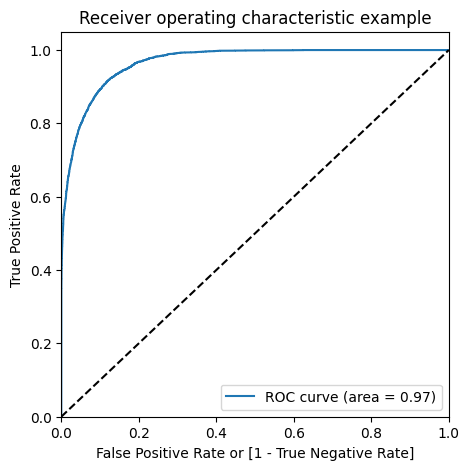

In [104]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_xgb_lbl_encoder)

## Need to check along with accuracy what is fairness KPI says

In [105]:
# Predictions on the train set
y_test_pred = xgb_lbl_encoder_model.predict(X_test)

In [106]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[6922  483]
 [ 849 1508]]


In [107]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [108]:
# Accuracy on the test dataset
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.8635525507068224
Sensitivity:- 0.6397963512940178
Specificity:- 0.9347738014854828
F1-Score:- 0.6936522539098436


training data have F1 score 80% but on the test data F1 score dropped to 70%

In [109]:
#df_measure_fair = pd.concat([X_test_split, y_test], axis=1)
df_measure_fair = X_test_split.copy()
df_measure_fair = df_measure_fair.reset_index(drop=True)
df_measure_fair.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,age_cat,sex_bin,marital_status_cat,relationship_cat,age_cat_e,workclass_e,occupation_e,relationship_cat_e,marital_status_cat_e,race_e
0,3643,31,State-gov,33308,AssociateLevel,11,Married-civ-spouse,Craft-repair,Husband,White,...,JUNIOR,0,Married,Family,0.173371,0.271644,0.232005,0.341048,0.449342,0.256661
1,16042,24,Federal-gov,130534,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,STUDENT,0,Never-married,Other,0.010326,0.391445,0.487589,0.087313,0.045790,0.255793
2,9404,60,Local-gov,98350,Bachelors,10,Married-civ-spouse,Other-service,Husband,Other,...,SENIOR,0,Married,Family,0.285740,0.301207,0.040963,0.338941,0.446741,0.211124
3,17910,31,Private,398988,Bachelors,10,Never-married,Exec-managerial,Not-in-family,White,...,JUNIOR,0,Never-married,Other,0.166749,0.217627,0.486327,0.086946,0.044606,0.255312
4,5200,43,Federal-gov,144778,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,MIDSENIOR,0,Never-married,Other,0.357804,0.398157,0.480171,0.087395,0.046729,0.256661


In [110]:
df_measure_fair.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'income_binary', 'age_s', 'fnlwgt_s',
       'education_num_s', 'capital_gain_s', 'capital_loss_s',
       'hours_per_week_s', 'education_e', 'age_cat', 'sex_bin',
       'marital_status_cat', 'relationship_cat', 'age_cat_e', 'workclass_e',
       'occupation_e', 'relationship_cat_e', 'marital_status_cat_e', 'race_e'],
      dtype='object')

In [111]:
y_test_pred.shape

(9762,)

In [112]:
y_test_pred[0:10,]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [113]:
#convertin numpy array to dataframe
data = y_test_pred
df_y_test_pred = pd.DataFrame(data = data[0:,],
                              index=[i for i in range(data.shape[0])],
                              columns = ['income_binary_pred']
                              )
df_y_test_pred.head(10)

,income_binary_pred
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [114]:
df_measure_fair = pd.concat([df_measure_fair, df_y_test_pred], axis=1)

df_measure_fair.head(10)

,Unnamed: 0,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,sex_bin,marital_status_cat,relationship_cat,age_cat_e,workclass_e,occupation_e,relationship_cat_e,marital_status_cat_e,race_e,income_binary_pred
0,3643,31,State-gov,33308,AssociateLevel,11,Married-civ-spouse,Craft-repair,Husband,White,...,0,Married,Family,0.173371,0.271644,0.232005,0.341048,0.449342,0.256661,0
1,16042,24,Federal-gov,130534,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,0,Never-married,Other,0.010326,0.391445,0.487589,0.087313,0.045790,0.255793,0
2,9404,60,Local-gov,98350,Bachelors,10,Married-civ-spouse,Other-service,Husband,Other,...,0,Married,Family,0.285740,0.301207,0.040963,0.338941,0.446741,0.211124,0
3,17910,31,Private,398988,Bachelors,10,Never-married,Exec-managerial,Not-in-family,White,...,0,Never-married,Other,0.166749,0.217627,0.486327,0.086946,0.044606,0.255312,0
4,5200,43,Federal-gov,144778,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,0,Never-married,Other,0.357804,0.398157,0.480171,0.087395,0.046729,0.256661,0
5,28785,50,Private,150975,HS-grad,9,Divorced,Machine-op-inspct,Not-in-family,Other,...,1,Spouse-Absent,Other,0.359519,0.219838,0.125044,0.087151,0.093348,0.206597,0
6,4638,66,State-gov,41506,School,6,Divorced,Other-service,Not-in-family,Black,...,1,Spouse-Absent,Other,0.289955,0.271644,0.042034,0.087395,0.094088,0.124025,0
7,1487,25,Private,174592,HS-grad,9,Never-married,Other-service,Own-child,White,...,1,Never-married,Family,0.167315,0.218589,0.042094,0.339809,0.045790,0.255793,0
8,20382,58,Private,354024,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,...,1,Married,Family,0.285740,0.217627,0.137689,0.338941,0.446741,0.255312,0
9,9814,45,Private,188950,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,...,0,Married,Family,0.363023,0.217627,0.486327,0.338941,0.446741,0.255312,1


In [115]:
# replacing the column name
df_measure_fair.columns = df_measure_fair.columns.str.replace('Unnamed: 0', 'Original_rownum')

In [116]:
df_measure_fair.columns

Index(['Original_rownum', 'age', 'workclass', 'fnlwgt', 'education',
       'education-num', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income', 'income_binary', 'age_s', 'fnlwgt_s',
       'education_num_s', 'capital_gain_s', 'capital_loss_s',
       'hours_per_week_s', 'education_e', 'age_cat', 'sex_bin',
       'marital_status_cat', 'relationship_cat', 'age_cat_e', 'workclass_e',
       'occupation_e', 'relationship_cat_e', 'marital_status_cat_e', 'race_e',
       'income_binary_pred'],
      dtype='object')

In [118]:
col_list = ['Original_rownum','age','age_cat','marital-status','marital_status_cat', 'relationship','relationship_cat','race','sex','sex_bin','income','income_binary','income_binary_pred']
df_m_f = df_measure_fair[col_list]



In [119]:
df_m_f.head()

,Original_rownum,age,age_cat,marital-status,marital_status_cat,relationship,relationship_cat,race,sex,sex_bin,income,income_binary,income_binary_pred
0,3643,31,JUNIOR,Married-civ-spouse,Married,Husband,Family,White,Male,0,<=50K,0,0
1,16042,24,STUDENT,Never-married,Never-married,Not-in-family,Other,White,Male,0,<=50K,0,0
2,9404,60,SENIOR,Married-civ-spouse,Married,Husband,Family,Other,Male,0,<=50K,0,0
3,17910,31,JUNIOR,Never-married,Never-married,Not-in-family,Other,White,Male,0,<=50K,0,0
4,5200,43,MIDSENIOR,Never-married,Never-married,Not-in-family,Other,White,Male,0,>50K,1,0


In [120]:
df_m_f.isnull().sum()

Original_rownum       0
age                   0
age_cat               0
marital-status        0
marital_status_cat    0
relationship          0
relationship_cat      0
race                  0
sex                   0
sex_bin               0
income                0
income_binary         0
income_binary_pred    0
dtype: int64

In [121]:
df_m_f.groupby(['race','sex']).agg({'Original_rownum': 'count'})

Original_rownum
race  sex                    
Black Female              482
      Male                456
Other Female              161
      Male                302
White Female             2544
      Male               5817

In [122]:
df_m_f.groupby(['marital_status_cat','relationship_cat','income_binary_pred']).agg({'Original_rownum': 'count'})

Original_rownum
marital_status_cat relationship_cat income_binary_pred                 
Married            Family           0                              2712
                                    1                              1806
                   Other            0                                32
                                    1                                 5
Never-married      Family           0                              1281
                                    1                                 4
                   Other            0                              1785
                                    1                                81
Spouse-Absent      Family           0                               139
                                    1                                 2
                   Other            0                              1822
                                    1                                93

In [123]:
df_m_f.groupby(['marital_status_cat','sex','income_binary_pred']).agg({'Original_rownum': 'count'})

Original_rownum
marital_status_cat sex    income_binary_pred                 
Married            Female 0                               278
                          1                               199
                   Male   0                              2466
                          1                              1612
Never-married      Female 0                              1413
                          1                                36
                   Male   0                              1653
                          1                                49
Spouse-Absent      Female 0                              1235
                          1                                26
                   Male   0                               726
                          1                                69

## Intersectional Sufficiency Metric

Identify the relevant demographic attributes (e.g., race, gender)

Measure the classification accuracy separately for each intersectional group by comparing the predicted and actual labels.

Develop a metric that combines accuracy across all groups, considering both overall accuracy and accuracy within each intersectional subgroup.

Utilize Python and relevant libraries (e.g., scikit-learn) to implement the calculation of Intersectional Sufficiency based on the defined metric.


In [124]:
from sklearn.metrics import accuracy_score

def calculate_intersectional_sufficiency(df, intersectional_groups):
    intersectional_sufficiency_scores = []

    # Iterate over each intersectional group
    for group in intersectional_groups:
        # Create a mask for the current intersectional group
        mask = (df['race'] == group[0]) & (df['sex'] == group[1])

        # Extract actual and predicted results for the current group
        actual_results = df.loc[mask, 'income_binary']
        predicted_results = df.loc[mask, 'income_binary_pred']

        # Calculate accuracy for the current group
        accuracy = accuracy_score(actual_results, predicted_results)

        # Append accuracy to the list
        intersectional_sufficiency_scores.append(accuracy)

    # Calculate the overall Intersectional Sufficiency metric
    overall_sufficiency = sum(intersectional_sufficiency_scores) / len(intersectional_sufficiency_scores)
    print(intersectional_sufficiency_scores)
    return overall_sufficiency



In [125]:
# Define your DataFrame df1
# For example:
# df1 = pd.DataFrame({'race': [...], 'sex': [...], 'actual_result': [...], 'predicted_result': [...]})

# Define the intersectional groups based on race and sex
intersectional_groups = [('Black', 'Female'), ('Black', 'Male'), ('White', 'Female'), ('White', 'Male'),('Other', 'Female'), ('Other', 'Male')]

# Calculate Intersectional Sufficiency
intersectional_sufficiency = calculate_intersectional_sufficiency(df_m_f, intersectional_groups)

print(f'Intersectional Sufficiency groups: {intersectional_groups}')

print(f'Intersectional Sufficiency Metric: {intersectional_sufficiency}')

#print(f'Intersectional Sufficiency individual group Metric: {iS_individual_group_scores}')

[0.9522821576763485, 0.9035087719298246, 0.9312106918238994, 0.8220732336255802, 0.9440993788819876, 0.847682119205298]
Intersectional Sufficiency groups: [('Black', 'Female'), ('Black', 'Male'), ('White', 'Female'), ('White', 'Male'), ('Other', 'Female'), ('Other', 'Male')]
Intersectional Sufficiency Metric: 0.9001427255238231


## Disparate Impact Calculation

In [126]:
import pandas as pd

def calculate_disparate_impact(df, categorical_features, target_true, target_pred):
    # Initialize dictionaries to store metric results for each group
    disparate_impact_dict = {}

    # Loop through each categorical feature
    for feature in categorical_features:
      # Calculate Disparate Impact for each group
      group_values = df[feature].unique()
      for value in group_values:
        #allignment
        # Filter the data for the specific group
        group_data = df[df[feature] == value]

        # Calculate positive outcome rates for the group
        positive_rate_group = group_data[target_true].sum() / len(group_data)

        # Calculate positive outcome rate for the overall dataset
        positive_rate_overall = df[target_true].sum() / len(df)

        # Calculate Disparate Impact for the group
        disparate_impact = positive_rate_group / positive_rate_overall

        # Store Disparate Impact in the dictionary
        disparate_impact_dict[f'{feature}_{value}'] = disparate_impact

    return disparate_impact_dict


In [127]:
df_m_f['race'].unique()

array(['White', 'Other', 'Black'], dtype=object)

In [128]:
categorical_features = ['race', 'sex']
target_true = 'income_binary'
target_pred = 'income_binary_pred'

disparate_impact_results = calculate_disparate_impact(df_m_f, categorical_features, target_true, target_pred)

# Print Disparate Impact for each group
for group, di_value in disparate_impact_results.items():
    print(f'Disparate Impact for {group}: {di_value}')


Disparate Impact for race_White: 1.0630427134649494
Disparate Impact for race_Other: 0.8945368375621168
Disparate Impact for race_Black: 0.4901165425674826
Disparate Impact for sex_Male: 1.27306265133709
Disparate Impact for sex_Female: 0.4366529863378205


In [129]:
from itertools import product

def generate_combinations(df, categorical_features):
    # Extract unique values from each categorical feature
    values_list = [df[feature].unique() for feature in categorical_features]

    # Generate all possible combinations using itertools.product
    combinations = list(product(*values_list))

    return combinations

In [130]:
combination_list = generate_combinations(df_m_f,categorical_features)
combination_list

[('White', 'Male'),
 ('White', 'Female'),
 ('Other', 'Male'),
 ('Other', 'Female'),
 ('Black', 'Male'),
 ('Black', 'Female')]

In [131]:
def calculate_disparate_impact_on_group(df, categorical_features, target_true, target_pred):
    # Initialize dictionaries to store metric results for each group
    disparate_impact_dict = {}
    combination_list = generate_combinations(df_m_f,categorical_features)

    for group in combination_list:
        #allignment
        # Filter the data for the specific group
        group_data = df[(df[categorical_features[0]] == group[0]) & (df[categorical_features[1]] == group[1])]

        # Calculate positive outcome rates for the group
        positive_rate_group = group_data[target_true].sum() / len(group_data)

        # Calculate positive outcome rate for the overall dataset
        positive_rate_overall = df[target_true].sum() / len(df)

        # Calculate Disparate Impact for the group
        disparate_impact = positive_rate_group / positive_rate_overall

        # Store Disparate Impact in the dictionary
        disparate_impact_dict[f'{group}'] = disparate_impact

    return disparate_impact_dict

In [132]:
disparate_impact_results = calculate_disparate_impact_on_group(df_m_f, categorical_features, target_true, target_pred)

# Print Disparate Impact for each group
for group, di_value in disparate_impact_results.items():
    print(f'Disparate Impact for {group}: {di_value}')

Disparate Impact for ('White', 'Male'): 1.3200484965394468
Disparate Impact for ('White', 'Female'): 0.4753844429679558
Disparate Impact for ('Other', 'Male'): 1.1519975723995313
Disparate Impact for ('Other', 'Female'): 0.41159806786709074
Disparate Impact for ('Black', 'Male'): 0.7538630730411094
Disparate Impact for ('Black', 'Female'): 0.2405970033642175


## XAI technique to understand on the test data what features has been used for prediction

In [133]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.2 MB/s eta 0:00:00


In [134]:
import shap

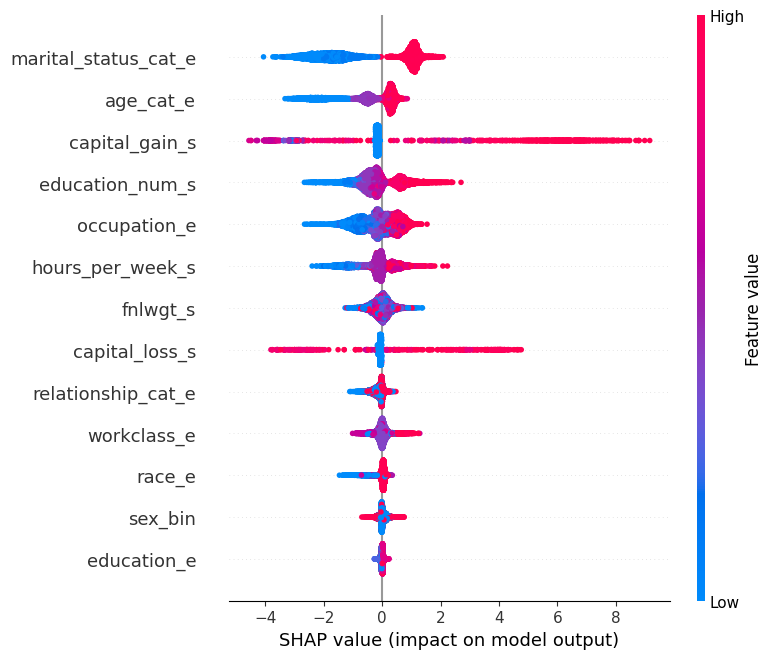

In [135]:
# Assuming you have a trained XGBoost model named xgb_model1 and your input data is in X_test
# Make sure your X_test is a pandas DataFrame or a NumPy array

# Create a SHAP explainer using the XGBoost model
explainer = shap.Explainer(xgb_lbl_encoder_model)

# Calculate SHAP values for a subset of the data (you can adjust the number of samples)
shap_values = explainer.shap_values(X_test)

# Plot summary plot (summary_plot) to visualize feature importances
shap.summary_plot(shap_values, X_test, show = False)

In [136]:
# If you want to visualize the impact of a single prediction, you can use force_plot
# Select a specific instance (change the index accordingly)
# Create a SHAP explainer using the XGBoost model
explainer = shap.Explainer(xgb_lbl_encoder_model)

# Calculate SHAP values for a subset of the data (you can adjust the number of samples)
shap_values = explainer.shap_values(X_test_split[list_of_x_column])

shap.initjs()
instance_index = 9
shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_test_split[list_of_x_column].iloc[instance_index, :], show=False)

In [139]:
X_test_split.iloc[9, :]

Unnamed: 0                            9814
age                                     45
workclass                          Private
fnlwgt                              188950
education                          Masters
education-num                           14
marital-status          Married-civ-spouse
occupation                 Exec-managerial
relationship                       Husband
race                                 White
sex                                   Male
capital-gain                             0
capital-loss                             0
hours-per-week                          50
native-country               United-States
income                                >50K
income_binary                            1
age_s                             0.470344
fnlwgt_s                         -0.007871
education_num_s                   1.523641
capital_gain_s                   -0.145975
capital_loss_s                   -0.216743
hours_per_week_s                  0.774269
education_e

In [137]:
shap.initjs()
instance_index = 2
shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_test_split[list_of_x_column].iloc[instance_index, :], show=False)

In [138]:
X_test_split.iloc[instance_index, :]

Unnamed: 0                            9404
age                                     60
workclass                        Local-gov
fnlwgt                               98350
education                        Bachelors
education-num                           10
marital-status          Married-civ-spouse
occupation                   Other-service
relationship                       Husband
race                                 Other
sex                                   Male
capital-gain                             0
capital-loss                             0
hours-per-week                          60
native-country                 Philippines
income                               <=50K
income_binary                            0
age_s                             1.570231
fnlwgt_s                         -0.866193
education_num_s                  -0.031815
capital_gain_s                   -0.145975
capital_loss_s                   -0.216743
hours_per_week_s                  1.584202
education_e

In [68]:
# If you want to visualize the impact of a single prediction, you can use force_plot
# Select a specific instance (change the index accordingly)
shap.initjs()
instance_index = 0
shap.force_plot(explainer.expected_value, shap_values[instance_index, :], X_test.iloc[instance_index, :], show=False)

In [140]:
categorical_features2 = ['marital_status_cat','age_cat','sex']

disparate_impact_results = calculate_disparate_impact_on_group(df_m_f, categorical_features2, target_true, target_pred)

# Print Disparate Impact for each group
for group, di_value in disparate_impact_results.items():
    print(f'Disparate Impact for {group}: {di_value}')

Disparate Impact for ('Married', 'JUNIOR', 'Male'): 1.3340325017995645
Disparate Impact for ('Married', 'JUNIOR', 'Female'): 1.3340325017995645
Disparate Impact for ('Married', 'STUDENT', 'Male'): 0.3451421298260501
Disparate Impact for ('Married', 'STUDENT', 'Female'): 0.3451421298260501
Disparate Impact for ('Married', 'SENIOR', 'Male'): 1.7426057184224348
Disparate Impact for ('Married', 'SENIOR', 'Female'): 1.7426057184224348
Disparate Impact for ('Married', 'MIDSENIOR', 'Male'): 2.1600202829194086
Disparate Impact for ('Married', 'MIDSENIOR', 'Female'): 2.1600202829194086
Disparate Impact for ('Never-married', 'JUNIOR', 'Male'): 0.25836726542744015
Disparate Impact for ('Never-married', 'JUNIOR', 'Female'): 0.25836726542744015
Disparate Impact for ('Never-married', 'STUDENT', 'Male'): 0.011331615753522848
Disparate Impact for ('Never-married', 'STUDENT', 'Female'): 0.011331615753522848
Disparate Impact for ('Never-married', 'SENIOR', 'Male'): 0.5242665263180508
Disparate Impact fo

Need to find those records where people have income more than 50K (income_binary = 0) but it has been predicted False (income_binary_pred = 0)

In [145]:
# The people already having income > 50K but model has been predicted as income less than 50K

df_false_TN = df_measure_fair[(df_measure_fair.income_binary == 1) & (df_measure_fair.income_binary_pred == 0)]
df_false_TN.head()

,Original_rownum,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,sex_bin,marital_status_cat,relationship_cat,age_cat_e,workclass_e,occupation_e,relationship_cat_e,marital_status_cat_e,race_e,income_binary_pred
4,5200,43,Federal-gov,144778,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,...,0,Never-married,Other,0.357804,0.398157,0.480171,0.087395,0.046729,0.256661,0
8,20382,58,Private,354024,HS-grad,9,Married-civ-spouse,Adm-clerical,Wife,White,...,1,Married,Family,0.285740,0.217627,0.137689,0.338941,0.446741,0.255312,0
11,5977,29,undefined,134566,Doctorate,16,Married-civ-spouse,undefined,Husband,White,...,0,Married,Family,0.165349,0.100655,0.100181,0.338059,0.444726,0.255898,0
15,23988,33,Private,296538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,...,0,Married,Family,0.173371,0.219115,0.271687,0.341048,0.449342,0.256661,0
36,4850,60,Self-emp-not-inc,376973,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,...,0,Married,Family,0.290772,0.286311,0.224284,0.338059,0.444726,0.255898,0


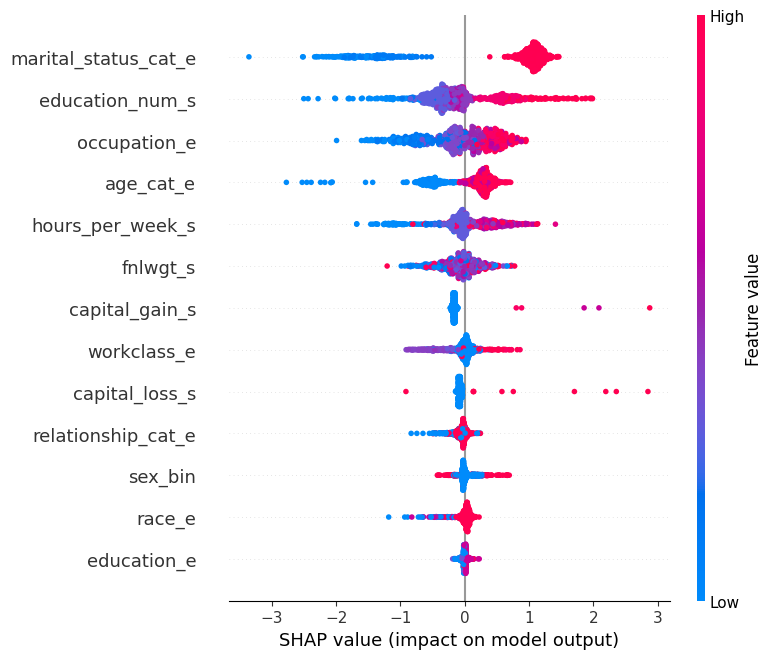

In [158]:
# Create a SHAP explainer using the XGBoost model
explainer_TN = shap.Explainer(xgb_lbl_encoder_model)

# Calculate SHAP values for a subset of the data (you can adjust the number of samples)
shap_values_TN = explainer_TN.shap_values(df_false_TN[list_of_x_column])

# Plot summary plot (summary_plot) to visualize feature importances
shap.summary_plot(shap_values_TN, df_false_TN[list_of_x_column], show = False)

The above SHAP summary showing the false outcome records driven by protected feature marital_status and age

In [161]:
df_false_TN.iloc[11,:]

Original_rownum                 29291
age                                60
workclass                     Private
fnlwgt                         202226
education                   Bachelors
education-num                      10
marital-status               Divorced
occupation               Craft-repair
relationship                Own-child
race                            White
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     44
native-country          United-States
income                           >50K
income_binary                       1
age_s                        1.570231
fnlwgt_s                     0.117902
education_num_s             -0.031815
capital_gain_s              -0.145975
capital_loss_s              -0.216743
hours_per_week_s             0.288309
education_e                         5
age_cat                        SENIOR
sex_bin                             0
marital_stat

In [159]:
shap.initjs()
instance_index = 11
shap.force_plot(explainer_TN.expected_value, shap_values_TN[instance_index, :], df_false_TN[list_of_x_column].iloc[instance_index, :], show=False)

In [160]:
pos = 0
shap_val_sum = 0
for i in list_of_x_column:
  print(i,":",shap_values_TN[instance_index,pos])
  shap_val_sum = shap_val_sum + shap_values_TN[instance_index,pos]
  pos = pos + 1

print("Total Shape Vale :",shap_val_sum )

fnlwgt_s : -0.2696787
education_num_s : -0.09641133
capital_gain_s : -0.1662724
capital_loss_s : -0.05191576
hours_per_week_s : 0.31097525
education_e : -0.017034898
sex_bin : 0.11340139
age_cat_e : 0.14187641
workclass_e : 0.00034530857
occupation_e : -0.016335038
relationship_cat_e : -0.31392816
marital_status_cat_e : -1.7201053
race_e : 0.035995886
Total Shape Vale : -2.049087337916717


The SHAP value of marital Status (Divorced = Spouse Absent) contributing most to derive the f(x) = -3.37 due to which the prediction came False (income less than 50K)
relationship shap value (-0.31) also nutrilizing the hours-per-week feature.

In [148]:
# The people already having income <= 50K but model has been predicted > 50K

df_false_FN = df_measure_fair[(df_measure_fair.income_binary == 0) & (df_measure_fair.income_binary_pred == 1)]
df_false_FN.head()

,Original_rownum,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,...,sex_bin,marital_status_cat,relationship_cat,age_cat_e,workclass_e,occupation_e,relationship_cat_e,marital_status_cat_e,race_e,income_binary_pred
18,13326,51,Private,122109,Bachelors,10,Married-civ-spouse,Adm-clerical,Wife,White,...,1,Married,Family,0.359519,0.219838,0.131672,0.339483,0.446307,0.256240,1
34,23565,30,Federal-gov,54684,Prof-school,15,Never-married,Exec-managerial,Not-in-family,White,...,0,Never-married,Other,0.167315,0.391445,0.487589,0.087313,0.045790,0.255793,1
44,2507,59,Self-emp-not-inc,104216,Prof-school,15,Married-civ-spouse,Sales,Husband,White,...,0,Married,Family,0.289955,0.275329,0.271687,0.341048,0.449342,0.256661,1
78,8032,39,Federal-gov,410034,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,...,0,Married,Family,0.362115,0.391445,0.135532,0.339809,0.447174,0.255793,1
81,9276,50,Local-gov,30682,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,...,0,Married,Family,0.357804,0.295472,0.452893,0.341048,0.449342,0.256661,1


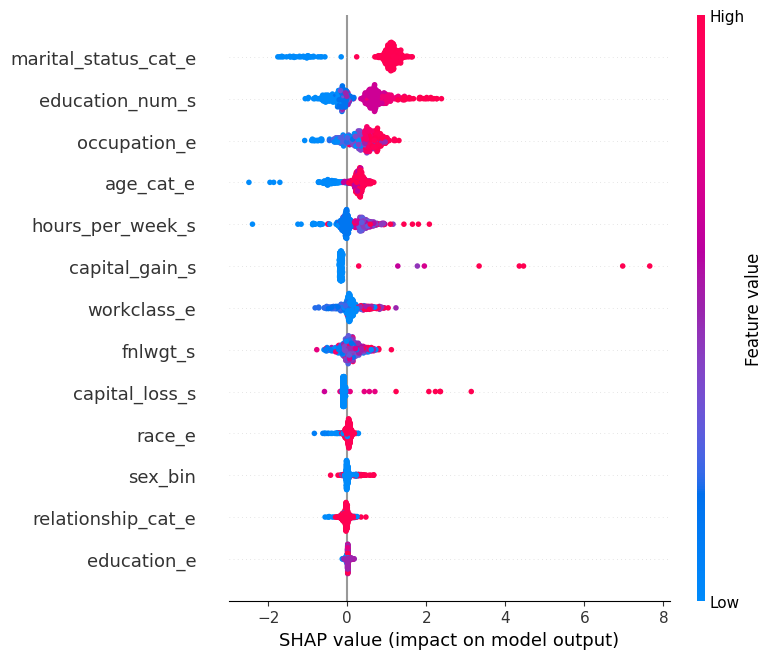

In [151]:
# Create a SHAP explainer using the XGBoost model
explainer_FN = shap.Explainer(xgb_lbl_encoder_model)

# Calculate SHAP values for a subset of the data (you can adjust the number of samples)
shap_values_FN = explainer_FN.shap_values(df_false_FN[list_of_x_column])

# Plot summary plot (summary_plot) to visualize feature importances
shap.summary_plot(shap_values_FN, df_false_FN[list_of_x_column], show = False)

In [152]:
shap.initjs()
instance_index = 34
shap.force_plot(explainer_FN.expected_value, shap_values_FN[instance_index, :], df_false_FN[list_of_x_column].iloc[instance_index, :], show=False)

In [153]:
shap.initjs()
instance_index = 78
shap.force_plot(explainer_FN.expected_value, shap_values_FN[instance_index, :], df_false_FN[list_of_x_column].iloc[instance_index, :], show=False)

In [157]:
pos = 0
shap_val_sum = 0
for i in list_of_x_column:
  print(i,":",shap_values_FN[instance_index,pos])
  shap_val_sum = shap_val_sum + shap_values_FN[instance_index,pos]
  pos = pos + 1

print("Total Shape Vale :",shap_val_sum )

fnlwgt_s : 0.1714724
education_num_s : 0.67623913
capital_gain_s : -0.19091643
capital_loss_s : -0.1108292
hours_per_week_s : -0.04641069
education_e : 0.094758466
sex_bin : -0.020104911
age_cat_e : -0.32066175
workclass_e : 0.007958766
occupation_e : 0.55675006
relationship_cat_e : -0.12864478
marital_status_cat_e : 1.3316996
race_e : -0.025146535
Total Shape Vale : 1.996164133772254


marital status SHAP value contribution is most to contribute f(x) = 0.68 inturns prediction has been done as True (income > 50K)
